# Diferencias finitas

### Ejercicio 1

Escribe una función derivadaNumerica que reciba: una función $f\colon \mathbb{R}\mapsto\mathbb{R}$, un punto $x_0\in\mathbb{R}$ y un número $h\in\mathbb{R}$. Esta función deberá calcular una aproximación a la derivada utilizando la definición indicada arriba ignorando la parte del límite. Es decir, algo como: derivada_numerica(f,x,h).

In [1]:
function derivada_numerica(f,x,h)
    
    y = (f(x+h) - f(x))/h
    
    return y
end

derivada_numerica (generic function with 1 method)

### Ejercicio 2
Utiliza tu función `derivada_numerica` para calcular la derivada de la función $\cos$ en un punto $x_0\in[0,1)$. Compara tu resultado con el que indica el cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$. Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$: $$\epsilon=\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)},$$ respecto a $h$.

In [2]:
derivada_numerica(cos,0.5,0.01)

-0.483805424462147

In [3]:
-sin(0.5)

-0.479425538604203

In [4]:
# Definimos una lista de valores de h que hacemos cada vez más pequeños.

X = [1, 0.50, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001]

10-element Array{Float64,1}:
 1.0   
 0.5   
 0.25  
 0.1   
 0.05  
 0.025 
 0.01  
 0.005 
 0.0025
 0.001 

In [5]:
# Definimos una lista para los valores de 1/h para graficar.

Z = [1, 2, 4, 10, 20, 40, 100, 200, 400, 1000]

10-element Array{Int64,1}:
    1
    2
    4
   10
   20
   40
  100
  200
  400
 1000

In [6]:
# Evaluamos la función derivada numérica en la lista con los valores de h.

Y = derivada_numerica.(cos,0.5,X)

10-element Array{Float64,1}:
 -0.806845
 -0.674561
 -0.583575
 -0.522469
 -0.501161
 -0.490345
 -0.483805
 -0.481617
 -0.480522
 -0.479864

In [7]:
# Llamamos a PyPlot para poder graficar nuestros datos

using PyPlot

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


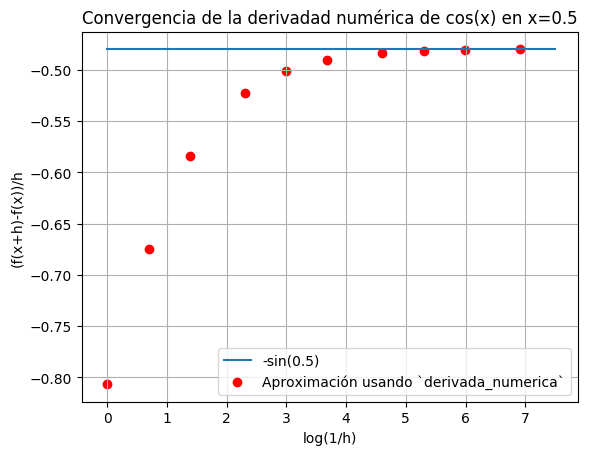

In [8]:
# Graficamos en el eje x en una escala logarítmica para observar de mejor manera el comportamiento de la convergencia.

# Graficamos la derivada real de cos(x) en x = 0.5:

X2 = linspace(0,7.5,100)
Y2 = -sin(0.5)*ones(length(X2))
plot(X2,Y2, label="-sin(0.5)")

# Luego, graficamos la aproximación dada por `derivada_numerica`

scatter(log.(Z),Y, label="Aproximación usando `derivada_numerica`", color="red")

title("Convergencia de la derivadad numérica de cos(x) en x=0.5")
xlabel("log(1/h)")
ylabel("(f(x+h)-f(x))/h")
legend()


grid("on")

In [9]:
# Definimos la función que nos da el error relativo en función de f, el punto x y h.

function err_rel_cos(x,h)
    
    e = (derivada_numerica(cos,x,h) + sin(x))/sin(x)
    
    return e
end

err_rel_cos (generic function with 1 method)

In [10]:
err_rel_cos(0.5,0.01)

-0.009135695755164812

In [11]:
# Hacemos una lista cuyos valores corresponden a los valores de la lista X evaluadas en la función de error relativo

W = err_rel_cos.(0.5,X)

10-element Array{Float64,1}:
 -0.682942   
 -0.407018   
 -0.217238   
 -0.0897823  
 -0.045336   
 -0.0227757  
 -0.0091357  
 -0.00457204 
 -0.00228707 
 -0.000915077

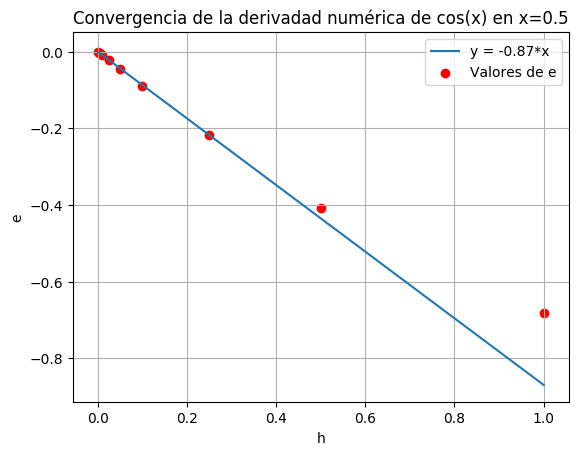

In [13]:
# Gráfica del error relativo en función de h.

scatter(X,W, label="Valores de e", color="red")

# Graficamos una función lineal para ajustar nuestros valores de e

plot(X, -0.87*X, label="y = -0.87*x")

title("Convergencia de la derivadad numérica de cos(x) en x=0.5")
xlabel("h")
ylabel("e")

legend()

grid("on")

Se puede observar que para valores de h muy pequeños (menores a 0.3), la relación entre e y h es aproximadamente lineal. Si h es mayor que 0.3, se puede notar que los datos dan una curva.

## Ejercicio 3

Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

Para mejorar la aproximación de la derivada podemos considerar la expansión en serie de Taylor de $f(x+h) - f(x-h)$. Tenemos que

$$f(x+h) = \sum^{\infty}_{n=0} \frac{h^n}{n!}\left.\frac{d^n}{dx^n}f(x)\right|_{x=\xi}$$

$$f(x-h) = \sum^{\infty}_{n=0} \frac{(-h)^n}{n!}\left.\frac{d^n}{dx^n}f(x)\right|_{x=\xi}$$

Así que

$$f(x+h) - f(x-h) = 2h\left.\frac{d}{dx}f(x)\right|_{x=\xi}  + 2 \frac{h^3}{3!}\left.\frac{d^3}{dx^3}f(x)\right|_{x=\xi} + \dots $$ 

donde se cancelan los términos pares. Por lo tanto,

$$\frac{f(x+h) - f(x-h)}{2h} = \left.\frac{d}{dx}f(x)\right|_{x=\xi}  + \mathcal{O}(h^2) $$

Con esto, podemos obtener una mejor aproximación a la derivada de una función en un punto.

## Ejercicio 4

Implementar la derivada simétrica:

In [24]:
function derivada_simetrica(f,x,h)
    
    z = (f(x+h) - f(x-h))/(2*h)
    
    return z
end

derivada_simetrica (generic function with 1 method)

In [25]:
derivada_simetrica(cos,0.5,2)

-0.21797020430365915

In [26]:
# Definimos una lista de valores de h que hacemos cada vez más pequeños.

X = [1, 0.50, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001]

10-element Array{Float64,1}:
 1.0   
 0.5   
 0.25  
 0.1   
 0.05  
 0.025 
 0.01  
 0.005 
 0.0025
 0.001 

In [27]:
# Definimos una lista para los valores de 1/h para graficar.

Z = [1, 2, 4, 10, 20, 40, 100, 200, 400, 1000]

10-element Array{Int64,1}:
    1
    2
    4
   10
   20
   40
  100
  200
  400
 1000

In [28]:
# Hacemos una lista cuyos valores corresponden a los valores de la lista X evaluadas en la función de derivada simétrica

Ys = derivada_simetrica.(cos,0.5,X)

10-element Array{Float64,1}:
 -0.403423
 -0.459698
 -0.474447
 -0.478627
 -0.479226
 -0.479376
 -0.479418
 -0.479424
 -0.479425
 -0.479425

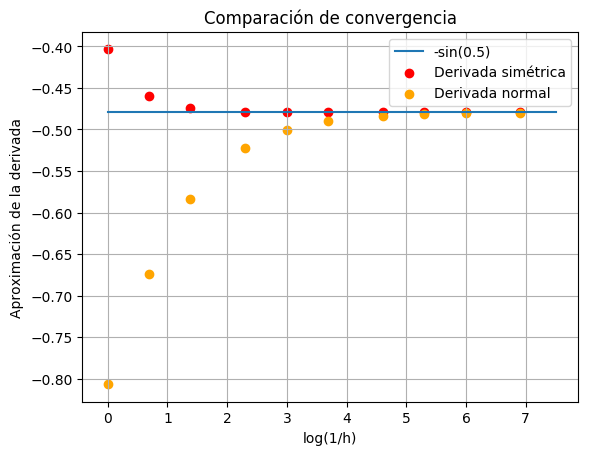

PyObject <matplotlib.legend.Legend object at 0x7f7b22aa2e50>

In [29]:
# Comparación entre ambas derivadas

X3 = linspace(0,7.5,100)
Y3 = -sin(0.5)*ones(length(X3))
plot(X3,Y3, label="-sin(0.5)")

scatter(log.(Z),Ys, label="Derivada simétrica", color="red")
scatter(log.(Z),Y, label="Derivada normal", color="orange")

title("Comparación de convergencia")
xlabel("log(1/h)")
ylabel("Aproximación de la derivada")

grid("on")
legend()

Claramente se puede observar que la derivada simétrica converge más rápido al valor real que la derivada normal.

In [30]:
# Definimos una función que nos regrese el error relativo para la derivada simétrica.

function err_rel_cos_s(x,h)
    
    e = (derivada_simetrica(cos,x,h) + sin(x))/sin(x)
    
    return e
end

err_rel_cos_s (generic function with 1 method)

In [31]:
err_rel_cos_s(0.5,0.01)

1.6666583340848647e-5

In [32]:
# Hacemos una lista cuyos valores corresponden a los valores de la lista X evaluadas en la función del error relativo

Ys2 = err_rel_cos_s.(0.5,X)

10-element Array{Float64,1}:
 0.158529   
 0.0411489  
 0.0103842  
 0.00166583 
 0.000416615
 0.000104163
 1.66666e-5 
 4.16666e-6 
 1.04167e-6 
 1.66667e-7 

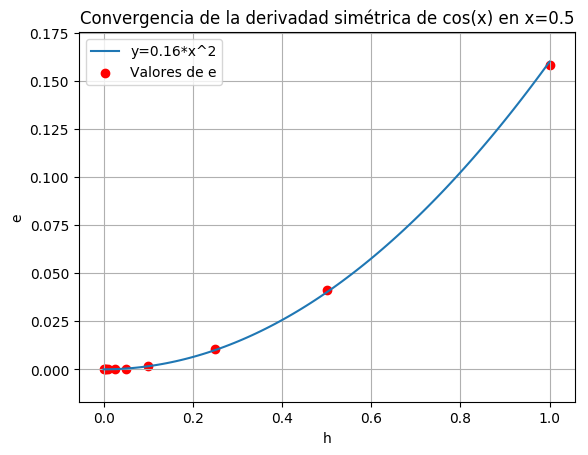

In [33]:
# Gráfica del error relativo de la derivada simétrica en función de h.

scatter(X,Ys2, label="Valores de e", color="red")

# Graficamos una función cuadrática para ajustar con nuestros valores de e

W1 = linspace(0,1,100)
W2 = 0.16*W1.^2
plot(W1,W2, label="y=0.16*x^2")

title("Convergencia de la derivadad simétrica de cos(x) en x=0.5")
xlabel("h")
ylabel("e")

legend()

grid("on")

Podemos observar que para valores pequeños de h, los valores de e y h tienen una relación cuadrática como lo predice el error dado por la derivada simétrica.

## Ejercicio 5

Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Demostración.- Sean $\alpha, \beta \in \, \mathbb{R}$ y $f, g$ dos funciones infinitamente derivables. Entonces

$$\begin{aligned}
    \Delta_h(\alpha f + \beta g) &= \sum^{\infty}_{n=1} \frac{h^n}{n!} \left.\frac{d^n}{dx^n} (\alpha f(x) + \beta g(x)) \right|_{x=\xi} \\
    &= \alpha\sum^{\infty}_{n=1} \frac{h^n}{n!} \left.\frac{d^n}{dx^n} f(x) \right|_{x=\xi} + \beta \sum^{\infty}_{n=1} \frac{h^n}{n!} \left.\frac{d^n}{dx^n} g(x) \right|_{x=\xi} \\
    &= \alpha \Delta_h f(x) + \beta \Delta_h g(x) \\
    &= \alpha f(x,h) + \beta g(x,h)
\end{aligned}
$$

Por lo tanto, $\Delta_h$ es un operadora lineal y lo podemos escribir como:

$$ \Delta_h=\sum_{n=1}^{\infty} \frac{h^n}{n!}\left.\frac{d^n}{dx^n}\right|_{x=\xi} $$


## Ejercicio 6

Debemos encontrar una función $\phi$ tal que $$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.

Notemos que

$$\begin{aligned}
    e^x &= \sum^{\infty}_{n=0} \frac{x^n}{n!} \\
    &= 1 + \sum^{\infty}_{n=1} \frac{x^n}{n!} \\
\end{aligned}
$$
$$\Rightarrow \sum^{\infty}_{n=1} \frac{x^n}{n!} = e^x - 1$$

Definiendo $\phi(x)=e^x-1$ y tomando $\displaystyle x=h\left.\frac{d}{dx}\right|_{x=\xi}$ obtenemos la relación que queremos:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right) = e^{\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)} - 1 = 1 + \sum_{n=1}^{\infty} \frac{h^n}{n!}\left.\frac{d^n}{dx^n}\right|_{x=\xi} - 1 = \sum_{n=1}^{\infty} \frac{h^n}{n!}\left.\frac{d^n}{dx^n}\right|_{x=\xi} $$
